# SIT 720 - Machine Learning

Lecturer: Chandan Karmakar | karmakar@deakin.edu.au

School of Information Technology,
<br/>Deakin University, VIC 3125, Australia.

## Assessment Task 5 (35 marks)

In this assignment, you will use a lot of concepts learnt in this course to come up with a good solution for a given chronic kidney disease prediction problem.

## Submission Instruction
1.  Student should insert Python code or text responses into the cell followed by the question.

2.  For answers regarding discussion or explanation, **maximum ten sentences are suggested**.

3.  Rename this notebook file appending your student ID. For example, for student ID 1234, the submitted file name should be A5_1234.ipynb.

4.  Insert your student ID and name in the following cell.

In [4]:
# Student ID: 218191552

# Student name: Pradeep Thapa

##The dataset

**Dataset file name:** chronic_kidney_disease.csv

**Attribute Information:** 

There are 24 features + class = 25 attributes
1.  Age(numerical): age in years
2.Blood Pressure(numerical): bp in mm/Hg
3.Specific Gravity(nominal): sg - (1.005,1.010,1.015,1.020,1.025)
4.Albumin(nominal): al - (0,1,2,3,4,5)
5.Sugar(nominal): su - (0,1,2,3,4,5)
6.Red Blood Cells(nominal): rbc - (normal,abnormal)
7.Pus Cell (nominal): pc - (normal,abnormal)
8.Pus Cell clumps(nominal): pcc - (present,notpresent)
9.Bacteria(nominal): ba - (present,notpresent)
10.Blood Glucose Random(numerical): bgr in mgs/dl
11.Blood Urea(numerical): bu in mgs/dl
12.Serum Creatinine(numerical): sc in mgs/dl
13.Sodium(numerical): sod in mEq/L
14.Potassium(numerical): pot in mEq/L
15.Hemoglobin(numerical): hemo in gms
16.Packed Cell Volume(numerical)
17.White Blood Cell Count(numerical): wc in cells/cumm
18.Red Blood Cell Count(numerical): rc in millions/cmm
19.Hypertension(nominal): htn - (yes,no)
20.Diabetes Mellitus(nominal): dm - (yes,no)
21.Coronary Artery Disease(nominal): cad - (yes,no)
22.Appetite(nominal): appet - (good,poor)
23.Pedal Edema(nominal): pe - (yes,no)
24.Anemia(nominal): ane - (yes,no)
25.Class (nominal): class - (ckd, notckd)


## Part 1: Short questions: **(6 marks)**




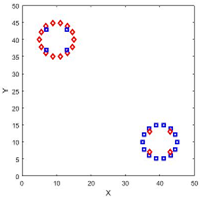


1.  For the above figure, what value of k in KNN method will give the best accuracy for leave-one-out cross-validation. Report accuracy and k value. **(3 marks)**

**Answer**

**5-NN method will give higher accuracy for leave-one-out cross validation. It is difficult to choose the perfect value of k in KNN. However, it is common to choose an odd number
when the problem is binary classification and other approach is to use square root of n where n is the number of data points in training data.
Lets split our data points into training and testing, we have total of 36 data points and if we do 70-30 split, around 26 data points can be
used for training and 10 for testing. Using sqrt(n) formula, we get around 5. So we can say that 5-KNN will give the best accuracy for leave-one-out
as it is odd number as well which suits the binary classification. In addition, higher k value has higher computational cost so it is better to use smaller value.**


**The accuracy is 28/36 which is 77.8%. 28 is the total number of points that are correctly classified
and 36 is the total number of data points.**

2.  In classification, overfitting and underfitting is a big problem. Does it happen in Random Forest or not? Why? **(3 marks)**

**Answer**

**When we have more (enough) trees in forest, random forest won't overfit the model.
The performance of Random Forest model does not impact due to overfitting problem as the number of trees increase.
However, a Random Forest with few trees is quite prone to overfit to noise. As more trees are added, the tendency to overfit generally decreases.
However, it is never completely free from overfit as no number of trees will ever remove overfit.**

**Underfitting can happen in random forest if we do not have enough depth as increasing depth can help to reduce underfitting.
Random Forest model can fail to capture important patterns in data which leads to underfit the model.**

## Part 2: **(24 marks = 4 methods x 6)**

Using the following four supervised machine learning methods, answer questions(A-D).
1.   Support vector machine
2.   K-Nearest Neighbour
3.   Decision tree, and
4.   Random forest

**A.**  Build optimised classification model to predict the chronic kidney disease from the dataset. **(1 marks)**

**B.** For each optimised model, answer the followings -  **(3 marks)**

*  which hyperparameters were optimised? [Hint: For SVM, kernel can be considered as one of the hyperparameters.]

*  what set or range of values were used for each hyperparameter?

*  which metric was used to measure the performance?

*  justify your design decisions.

**C.**  Plot the prediction performance against hyperparameter values to visualise the optimisation process and mark the optimal value. **(1 marks)**

**D.** Evaluate the model (obtained from A) performance on the test set. Report the confusion matrix, F1-score and accuracy. **(1 marks)**

**Import required libraries**

In [5]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

**Load Chronic Kidney Disease csv file**

In [6]:
# load data
df = pd.read_csv('chronic_kidney_disease.csv',na_values='?')
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,0,0,1,1,121.0,...,44,7800,5.2,0,0,1,1,1,1,ckd
1,7.0,50.0,1.020,4.0,0.0,0,0,1,1,NaN,...,38,6000,0.0,1,1,1,1,1,1,ckd
2,62.0,80.0,1.010,2.0,3.0,0,0,1,1,423.0,...,31,7500,0.0,1,0,1,0,1,0,ckd
3,48.0,70.0,1.005,4.0,0.0,0,1,0,1,117.0,...,32,6700,3.9,0,1,1,0,0,0,ckd
4,51.0,80.0,1.010,2.0,0.0,0,0,1,1,106.0,...,35,7300,4.6,1,1,1,1,1,1,ckd


**Exploratory Data Analysis**

In [7]:
# check for missing values
df.isna().sum()

age       9
bp       12
sg       47
al       46
su       49
rbc       0
pc        0
pcc       0
ba        0
bgr      44
bu       19
sc       17
sod      87
pot      88
hemo     52
pcv       0
wbcc      0
rbcc      0
htn       0
dm        0
cad       0
appet     0
pe        0
ane       0
class     0
dtype: int64

**Train Test Split**

**In order to avoid data leakage, split train and test data before imputing missing value**

In [8]:
train, test = train_test_split(df, test_size=0.2, shuffle=True, random_state=45, stratify=df['class'])
train.shape, test.shape

((320, 25), (80, 25))

**We know that the class is categorical, so we need to convert into numerical so we are going to map the numerical values.**

In [9]:
# number to map
mapper = {'ckd':0, 'notckd':1}

# map numerical values
train['class'] = train['class'].map(mapper)
test['class'] = test['class'].map(mapper)

**Features and Target separation**

In [10]:
# features
x_train = train.iloc[:, :24]
x_test = test.iloc[:, :24]

# target
y_train = train.iloc[:, 24]
y_test = test.iloc[:, 24]

# shape
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((320, 24), (320,), (80, 24), (80,))

**We can see we have some missing values in the csv.**
As we have less data, we cannot drop the missing data, instead we need to fill the missing values.

**Impute missing value for 'age' column in Train and Test data**

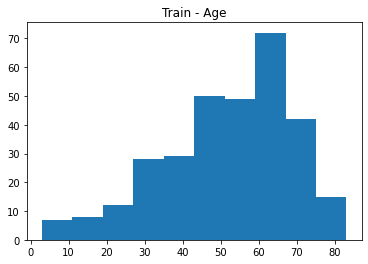

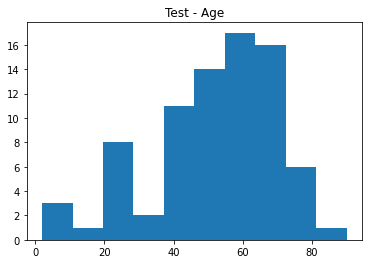

In [11]:
# plot histogram for train
plt.hist(x_train.age)
plt.title('Train - Age')
plt.show()

# plot histogram for test
plt.hist(x_test.age)
plt.title('Test - Age')
plt.show()

**We can see that the both train and test histograms are left skew. For this reason, median is better choice.**

In [12]:
# fill missing age values with median
impute_median = SimpleImputer(missing_values=np.nan, strategy='median')
x_train['age'] = impute_median.fit_transform(x_train['age'].values.reshape(-1,1))
x_test['age'] = impute_median.fit_transform(x_test['age'].values.reshape(-1,1))

**Impute missing value for 'bp' column**

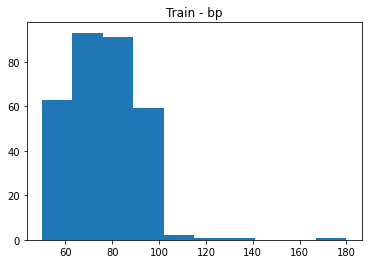

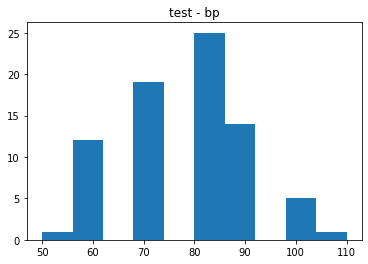

In [13]:
# bp train histogram
plt.hist(x_train['bp'])
plt.title('Train - bp')
plt.show()

# bp test histogram
plt.hist(x_test['bp'])
plt.title('test - bp')
plt.show()

**As we can see the most of the values are between 50-100, it is better to use median to impute missing
values so that outliers do not affect.**

In [14]:
# impute missing values with median
x_train['bp'] = impute_median.fit_transform(x_train['bp'].values.reshape(-1,1))
x_test['bp'] = impute_median.fit_transform(x_test['bp'].values.reshape(-1,1))

**Impute missing value for 'sg' column**

Column 'sg' is categorical value, so it is better to impute with mode for missing values

In [15]:
# mode imputer
mode_impute = SimpleImputer(strategy='most_frequent')

# impute 'sg' with most frequent
x_train['sg'] = mode_impute.fit_transform(x_train['sg'].values.reshape(-1,1))
x_test['sg'] = mode_impute.fit_transform(x_test['sg'].values.reshape(-1,1))

**Impute missing value for 'al' column**

Column 'al' is categorical value, so it is better to impute with mode for missing values

In [16]:
# impute 'al' with most frequent
x_train['al'] = mode_impute.fit_transform(x_train['al'].values.reshape(-1,1))
x_test['al'] = mode_impute.fit_transform(x_test['al'].values.reshape(-1,1))

**Impute missing value for 'su' column**

Column 'su' is categorical value so it is better to impute with mode for missing values

In [17]:
# impute 'al' with most frequent
x_train['su'] = mode_impute.fit_transform(x_train['su'].values.reshape(-1,1))
x_test['su'] = mode_impute.fit_transform(x_test['su'].values.reshape(-1,1))

**Impute missing value for 'bgr' column**

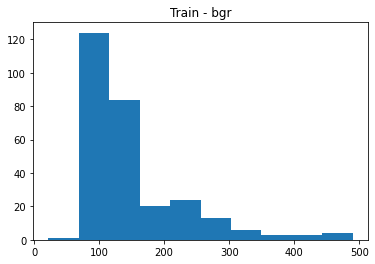

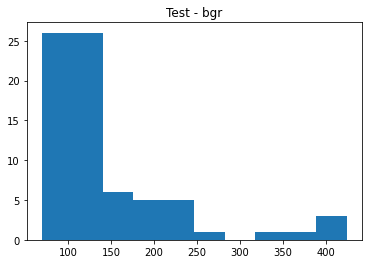

In [18]:
# bgr train histogram
plt.hist(x_train['bgr'])
plt.title('Train - bgr')
plt.show()

# bgr test histogram
plt.hist(x_test['bgr'])
plt.title('Test - bgr')
plt.show()

In [19]:
# check statistics for 'bgr'
print('Train:\n', x_train['bgr'].describe())
print('\n\nTest:\n', x_test['bgr'].describe())

Train:
 count    282.000000
mean     148.429078
std       78.994686
min       22.000000
25%      100.000000
50%      121.000000
75%      164.500000
max      490.000000
Name: bgr, dtype: float64


Test:
 count     74.000000
mean     146.540541
std       80.893163
min       70.000000
25%       97.500000
50%      120.000000
75%      158.500000
max      424.000000
Name: bgr, dtype: float64


**Most of the values are between 100 to 200 in training data and 80 to 170 in test data so the mean seems better option to impute the missing values.**

In [20]:
# mean imputer
mean_impute = SimpleImputer()

# impute missing values with mean
x_train['bgr'] = mean_impute.fit_transform(x_train['bgr'].values.reshape(-1,1))
x_test['bgr'] = mean_impute.fit_transform(x_test['bgr'].values.reshape(-1,1))

**Impute missing value for 'bu' column**

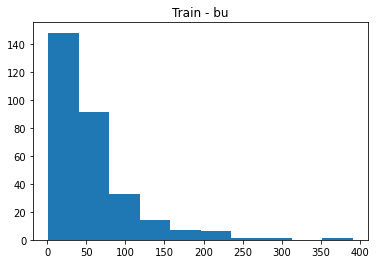

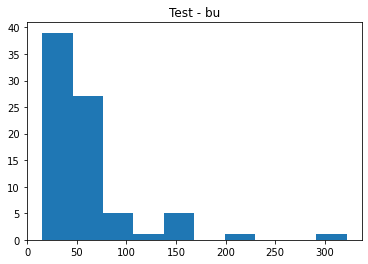

Train:
 count    302.000000
mean      57.811921
std       50.718274
min        1.500000
25%       27.000000
50%       41.500000
75%       66.000000
max      391.000000
Name: bu, dtype: float64
Test:

 count     79.000000
mean      55.949367
std       49.963807
min       15.000000
25%       25.000000
50%       46.000000
75%       59.000000
max      322.000000
Name: bu, dtype: float64


In [21]:
# 'bu' train histogram
plt.hist(x_train['bu'])
plt.title('Train - bu')
plt.show()

# 'bu' test histogram
plt.hist(x_test['bu'])
plt.title('Test - bu')
plt.show()

# check statistics
print('Train:\n' , x_train['bu'].describe())
print('Test:\n\n' , x_test['bu'].describe())

**Most of the values are between 1 to 80 and the mean seems better option to impute the missing values.**

In [22]:
# impute missing values with mean
x_train['bu'] = mean_impute.fit_transform(x_train['bu'].values.reshape(-1,1))
x_test['bu'] = mean_impute.fit_transform(x_test['bu'].values.reshape(-1,1))

**Impute missing value for 'sc' column**

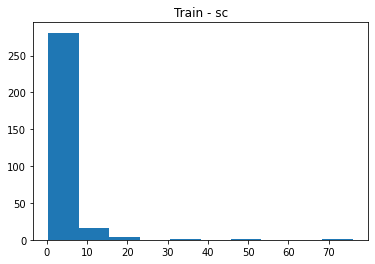

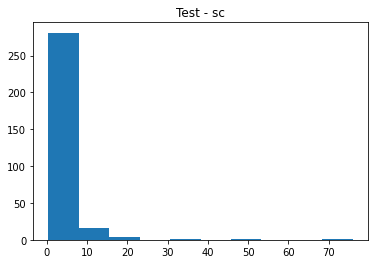

Train
: count    304.000000
mean       3.165954
std        6.149875
min        0.400000
25%        0.900000
50%        1.300000
75%        2.800000
max       76.000000
Name: sc, dtype: float64
Test

: count    79.000000
mean      2.712658
std       3.786425
min       0.500000
25%       0.950000
50%       1.200000
75%       2.600000
max      24.000000
Name: sc, dtype: float64


In [23]:
# 'sc' train histogram
plt.hist(x_train['sc'])
plt.title('Train - sc')
plt.show()

# 'sc' test histogram
plt.hist(x_train['sc'])
plt.title('Test - sc')
plt.show()

# check statistics
print('Train\n:', x_train['sc'].describe())
print('Test\n\n:', x_test['sc'].describe())

**Most of the values are between 1 to 8 and the mean seems better option to impute the missing values.**

In [24]:
# impute missing values with mean
x_train['sc'] = mean_impute.fit_transform(x_train['sc'].values.reshape(-1,1))
x_test['sc'] = mean_impute.fit_transform(x_test['sc'].values.reshape(-1,1))

**Impute missing value for 'sod' column**

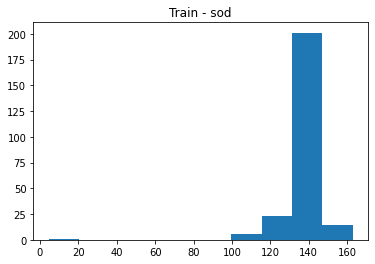

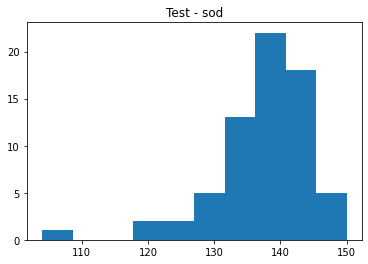

Train:

 count    245.000000
mean     137.573469
std       11.136021
min        4.500000
25%      135.000000
50%      138.000000
75%      142.000000
max      163.000000
Name: sod, dtype: float64
Test:

 count     68.000000
mean     137.367647
std        7.270682
min      104.000000
25%      135.000000
50%      138.000000
75%      141.250000
max      150.000000
Name: sod, dtype: float64


In [25]:
# 'sod' train histogram
plt.hist(x_train['sod'])
plt.title('Train - sod')
plt.show()

# 'sod' test histogram
plt.hist(x_test['sod'])
plt.title('Test - sod')
plt.show()

# check statistics
print('Train:\n\n', x_train['sod'].describe())
print('Test:\n\n', x_test['sod'].describe())

**From above histogram, we can see that 'sod' has outliers. As we have limited data, I am going to convert into missing values (nan).**

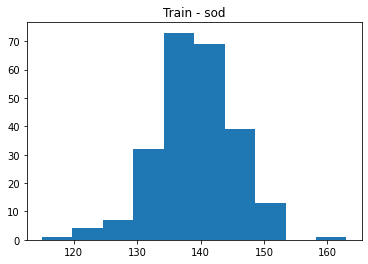

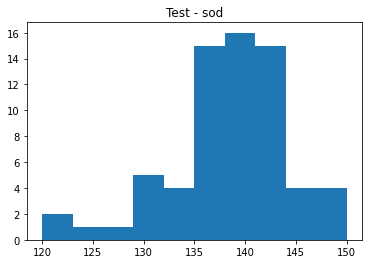

Train:

 count    239.000000
mean     138.644351
std        6.234483
min      115.000000
25%      135.000000
50%      139.000000
75%      142.000000
max      163.000000
Name: sod, dtype: float64
Test:

 count     67.000000
mean     137.865672
std        6.045022
min      120.000000
25%      135.000000
50%      138.000000
75%      141.500000
max      150.000000
Name: sod, dtype: float64


In [26]:
# set outlier to nan value
x_train['sod'] = x_train['sod'].apply(lambda x: np.nan if x<115 else x)
x_test['sod'] = x_test['sod'].apply(lambda x: np.nan if x<115 else x)

# 'sod' train histogram
plt.hist(x_train['sod'])
plt.title('Train - sod')
plt.show()

# 'sod' test histogram
plt.hist(x_test['sod'])
plt.title('Test - sod')
plt.show()

# check statistics
print('Train:\n\n', x_train['sod'].describe())
print('Test:\n\n', x_test['sod'].describe())

**Most of the values are between 110 to 160 and the mean seems better option to impute the missing values.**

In [27]:
# impute missing values with mean
x_train['sod'] = mean_impute.fit_transform(x_train['sod'].values.reshape(-1,1))
x_test['sod'] = mean_impute.fit_transform(x_test['sod'].values.reshape(-1,1))

**Impute missing value for 'pot' column**

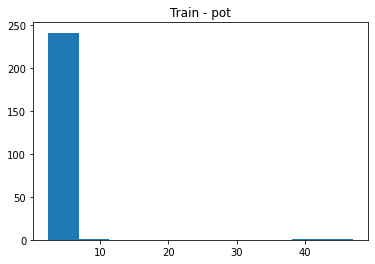

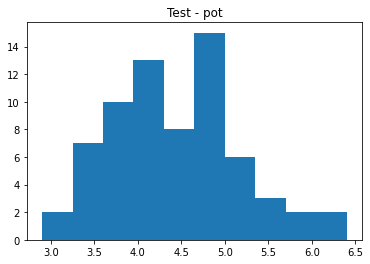

Train:

 count    244.000000
mean       4.679918
std        3.590598
min        2.500000
25%        3.800000
50%        4.400000
75%        4.900000
max       47.000000
Name: pot, dtype: float64
Test:

 count    68.000000
mean      4.438235
std       0.738702
min       2.900000
25%       3.875000
50%       4.400000
75%       4.900000
max       6.400000
Name: pot, dtype: float64


In [28]:
# 'pot' train histogram
plt.hist(x_train['pot'])
plt.title('Train - pot')
plt.show()

# 'pot' test histogram
plt.hist(x_test['pot'])
plt.title('Test - pot')
plt.show()

# check statistics
print('Train:\n\n', x_train['pot'].describe())
print('Test:\n\n', x_test['pot'].describe())

**From above histogram, we can see that 'sod' has outliers. As we have limited data, I am going to convert into missing values (nan).**

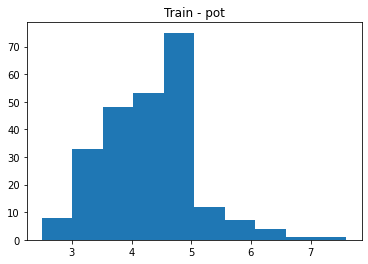

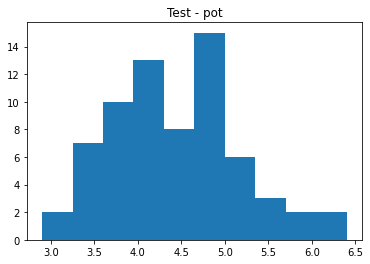

Train:

 count    242.000000
mean       4.363223
std        0.761421
min        2.500000
25%        3.800000
50%        4.400000
75%        4.900000
max        7.600000
Name: pot, dtype: float64
Test:

 count    68.000000
mean      4.438235
std       0.738702
min       2.900000
25%       3.875000
50%       4.400000
75%       4.900000
max       6.400000
Name: pot, dtype: float64


In [29]:
# set outlier to nan value
x_train['pot'] = x_train['pot'].apply(lambda x: np.nan if x>9 else x)
x_test['pot'] = x_test['pot'].apply(lambda x: np.nan if x>9 else x)

# 'pot' train histogram
plt.hist(x_train['pot'])
plt.title('Train - pot')
plt.show()

# 'pot' test histogram
plt.hist(x_test['pot'])
plt.title('Test - pot')
plt.show()

# check statistics
print('Train:\n\n', x_train['pot'].describe())
print('Test:\n\n', x_test['pot'].describe())

**Most of the values are between 3 to 6 and the mean seems better option to impute the missing values.**

In [30]:
# impute missing values with mean
x_train['pot'] = mean_impute.fit_transform(x_train['pot'].values.reshape(-1,1))
x_test['pot'] = mean_impute.fit_transform(x_test['pot'].values.reshape(-1,1))

**Impute missing value for 'hemo' column**

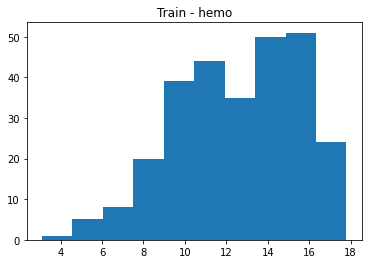

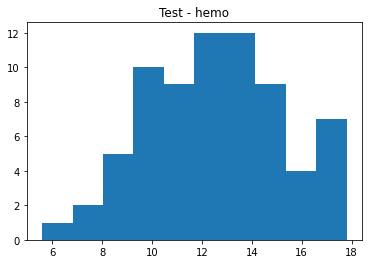

Train:

 count    277.000000
mean      12.522022
std        2.951391
min        3.100000
25%       10.300000
50%       12.800000
75%       15.000000
max       17.800000
Name: hemo, dtype: float64
Test:

 count    71.000000
mean     12.543662
std       2.776109
min       5.600000
25%      10.550000
50%      12.400000
75%      14.800000
max      17.800000
Name: hemo, dtype: float64


In [31]:
# 'hemo' train histogram
plt.hist(x_train['hemo'])
plt.title('Train - hemo')
plt.show()

# 'hemo' test histogram
plt.hist(x_test['hemo'])
plt.title('Test - hemo')
plt.show()

# check statistics
print('Train:\n\n', x_train['hemo'].describe())
print('Test:\n\n', x_test['hemo'].describe())

**Most of the values are between 4 to 17 and the mean seems better option to impute the missing values.**

In [32]:
# impute missing values with mean
x_train['hemo'] = mean_impute.fit_transform(x_train['hemo'].values.reshape(-1,1))
x_test['hemo'] = mean_impute.fit_transform(x_test['hemo'].values.reshape(-1,1))

**Check for missing values**

In [33]:
print('Train:\n\n', x_train.isna().sum())
print('Test:\n\n', x_test.isna().sum())

Train:

 age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64
Test:

 age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64


**Separate Categorical and Numerical features**

In [34]:
# numerical features
num_features = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']

# categroical features
cat_features = ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

**Standard Scaler for Numerical Features**

In [35]:
# standard scaler
num_transform = ColumnTransformer([
    ('scale', StandardScaler(), num_features)
], remainder='passthrough', n_jobs=-1)

**Store model's accuracy to plot later**

In [36]:
model_performance = []

**Support Vector Machine**

The SVM accuracy is 93.75%
The SVM F1 Score is 91.53%
Classification Report:
              precision    recall  f1-score   support

         ckd       0.94      0.96      0.95        50
      notckd       0.93      0.90      0.92        30

    accuracy                           0.94        80
   macro avg       0.94      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



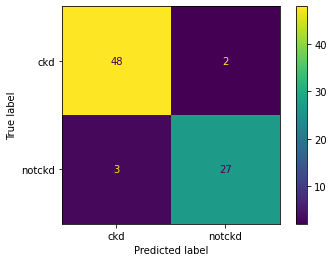

In [37]:
# svm clasifier
svm_clf = SVC(random_state=11)

# build pipeline
svm_pipeline = Pipeline([
    ('numerical scaling', num_transform),
    ('svm', svm_clf)
])

# fit
svm_pipeline.fit(x_train, y_train)

# predict
y_pred = svm_pipeline.predict(x_test)

# accuracy score
print(f'The SVM accuracy is {accuracy_score(y_test, y_pred)*100:.2f}%')

# F1 score
print(f'The SVM F1 Score is {f1_score(y_test, y_pred)*100:.2f}%')

# confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)

# display confusion matrix
ConfusionMatrixDisplay(confusion_mtx, display_labels=['ckd', 'notckd']).plot()

# classification report
print(f"Classification Report:\n{classification_report(y_test, y_pred, target_names=['ckd', 'notckd'])}")

**Gridsearch SVM Classifier**

In [38]:
# parameters to Gridsearch
svm_params = [
    {'svm__C':[5,10,15,20,25,30,35]},
    {'svm__C':[5,10,15,30,50,60,70,100], 'svm__kernel':['Polynomial', 'RBF', 'Sigmoid', 'Linear']}
]

# grid search
svm_gs = GridSearchCV(svm_pipeline, param_grid=svm_params, scoring='recall', cv=5, n_jobs=-1)

# fit
svm_gs.fit(x_train, y_train)

# best parameters
print(f'Best parameters: {svm_gs.best_params_}')

# best score
print(f'Best score: {svm_gs.best_score_}')

# sotre cv results
cv_results = svm_gs.cv_results_

Best parameters: {'svm__C': 10}
Best score: 0.975


**A. Build optimised classification model to predict the chronic kidney disease from the dataset.**

In [39]:
# optimised svm clasifier
svm_optimised = SVC(C=10, random_state=11)

# build pipeline
svm_opt_pipeline = Pipeline([
    ('numerical scaling', num_transform),
    ('svm', svm_optimised)
])

# train the model
svm_opt_pipeline.fit(x_train, y_train)

Pipeline(steps=[('numerical scaling',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  ['age', 'bp', 'bgr', 'bu',
                                                   'sc', 'sod', 'pot', 'hemo',
                                                   'pcv', 'wbcc', 'rbcc'])])),
                ('svm', SVC(C=10, random_state=11))])

**B. For each optimised model, answer the followings - (3 marks)**
- **which hyperparameters were optimised? [Hint: For SVM, kernel can be considered as one of the hyperparameters.]**
> 'C' hyperparameter was optimised with deafult kernel 'rbf' and
>'C' parameter with different kernel such as rbf, linear, etc.


- **what set or range of values were used for each hyperparameter?**
> For hyperparameter 'C', I used the values of [5,10,15,20,25,30,35].
> For hyperparameter 'Kernel', I used the values of ['Polynomial', 'RBF', 'Sigmoid', 'Linear'].


- **which metric was used to measure the performance?**
> I used recall to measure the performance because
>it is important to make sure all the patients with disease are identified regardless of
>raising a false alarm. This metrics helps to make sure that the actual positive cases are detected, in other word, the actual positive cases should
>not go undetected.


- **justify your design decisions.**
> Penalty parameter C is the error term. It also controls the trade-off between smooth decision boundaries and classifying the training points correctly so
>it is important to find the optimal value. Similarly, Kernel parameters also have a significant effect on the decision boundary so it is
>important to find the right kernel.


**C. Plot the prediction performance against hyperparameter values to visualise the optimisation
process and mark the optimal value.**

In [40]:
# put cv_results into dataframe
cv_df = pd.DataFrame(cv_results)
cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svm__C,param_svm__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.032396,0.017207,0.016401,0.006999,5,NaN,{'svm__C': 5},0.958333,0.958333,0.875000,1.0,1.0,0.958333,0.045644,7
1,0.033268,0.012254,0.015097,0.004147,10,NaN,{'svm__C': 10},0.958333,1.000000,0.916667,1.0,1.0,0.975000,0.033333,1
2,0.035529,0.010812,0.017500,0.003727,15,NaN,{'svm__C': 15},0.958333,0.958333,0.916667,1.0,1.0,0.966667,0.031180,6
3,0.021053,0.003256,0.014052,0.001178,20,NaN,{'svm__C': 20},0.958333,0.958333,0.958333,1.0,1.0,0.975000,0.020412,1
4,0.030072,0.012410,0.019295,0.004592,25,NaN,{'svm__C': 25},0.958333,0.958333,0.958333,1.0,1.0,0.975000,0.020412,1
5,0.019815,0.002207,0.013468,0.001035,30,NaN,{'svm__C': 30},0.958333,0.958333,0.958333,1.0,1.0,0.975000,0.020412,1
6,0.020172,0.001962,0.013939,0.001892,35,NaN,{'svm__C': 35},0.958333,0.958333,0.958333,1.0,1.0,0.975000,0.020412,1
7,0.017754,0.001830,0.000000,0.000000,5,Polynomial,"{'svm__C': 5, 'svm__kernel': 'Polynomial'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,37
8,0.016623,0.000386,0.000000,0.000000,5,RBF,"{'svm__C': 5, 'svm__kernel': 'RBF'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,36
9,0.016737,0.000271,0.000000,0.000000,5,Sigmoid,"{'svm__C': 5, 'svm__kernel': 'Sigmoid'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,35


**Visualise the Optimization process**

I ran two sets of hyperparmeter tuning and first set has the optimal value so I will be only plotting first set of hyperparemeter
which is hyperparameter 'C', other parameters are defalut such as 'Kernel' is 'rbf'.

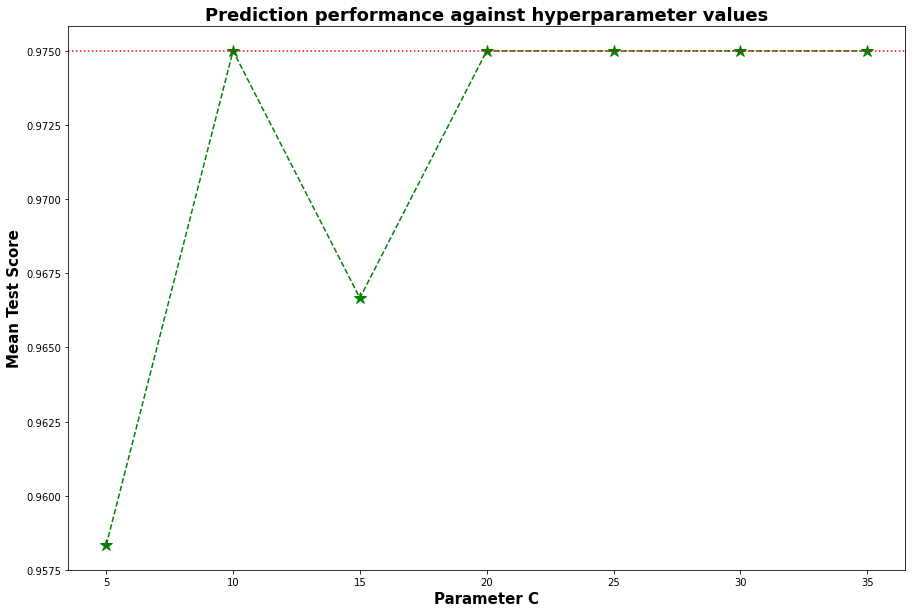

In [41]:
# select columns to plot
X = cv_df[['param_svm__C', 'mean_test_score']]

# plot graph
plt.figure(figsize=(15,10))
plt.title('Prediction performance against hyperparameter values', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.plot(X.iloc[:, 0], X.iloc[:, 1], linestyle='--', marker='*', markersize=12, color='green')
plt.axhline(np.max(X.iloc[:, 1]), linestyle=':', color='red')
plt.xlabel('Parameter C', fontdict={'fontsize':15, 'fontweight':'bold'})
plt.ylabel('Mean Test Score', fontdict={'fontsize':15, 'fontweight':'bold'})
plt.show()

**NOTE: Horizontal lines represent the best/optimal values of parameter C. The *First* point of
touch in the horizontal line is optimal value (C=10), however other points on that line can also be considered optimal values.**

**D. Evaluate the model (obtained from A) performance on the test set. Report the confusion
matrix, F1-score and accuracy.**

The SVM accuracy is 97.50%
The SVM F1 Score is 96.55%
Classification Report:
              precision    recall  f1-score   support

         ckd       0.96      1.00      0.98        50
      notckd       1.00      0.93      0.97        30

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80



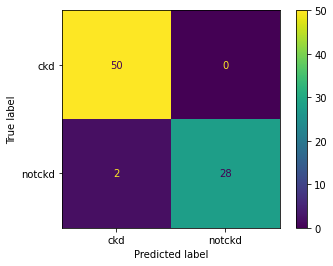

In [42]:
# predict
y_pred = svm_opt_pipeline.predict(x_test)

# accuracy score
acc = f'{accuracy_score(y_test, y_pred)*100:.2f}%'
print(f'The SVM accuracy is {acc}')

# store for plotting
model_performance.append(('SVM', f1_score(y_test, y_pred)))

# F1 score
print(f'The SVM F1 Score is {f1_score(y_test, y_pred)*100:.2f}%')

# confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)

# display confusion matrix
ConfusionMatrixDisplay(confusion_mtx, display_labels=['ckd', 'notckd']).plot()

# classification report
print(f"Classification Report:\n{classification_report(y_test, y_pred, target_names=['ckd', 'notckd'])}")

**K-Nearest Neighbour**

The KNN accuracy is 92.50%
The KNN F1 Score is 90.32%
Classification Report:
              precision    recall  f1-score   support

         ckd       0.96      0.92      0.94        50
      notckd       0.88      0.93      0.90        30

    accuracy                           0.93        80
   macro avg       0.92      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



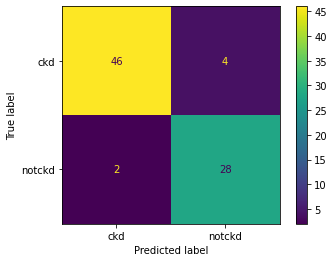

In [43]:
# svm clasifier
knn_clf = KNeighborsClassifier()

# build pipeline
knn_pipeline = Pipeline([
    ('numerical scaling', num_transform),
    ('knn', knn_clf)
])

# fit
knn_pipeline.fit(x_train, y_train)

# predict
y_pred = knn_pipeline.predict(x_test)

# accuracy score
print(f'The KNN accuracy is {accuracy_score(y_test, y_pred)*100:.2f}%')

# F1 score
print(f'The KNN F1 Score is {f1_score(y_test, y_pred)*100:.2f}%')

# confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)

# display confusion matrix
ConfusionMatrixDisplay(confusion_mtx, display_labels=['ckd', 'notckd']).plot()

# classification report
print(f"Classification Report:\n{classification_report(y_test, y_pred, target_names=['ckd', 'notckd'])}")

**Gridsearch KNN Classifier**

In [44]:
# parameters to Gridsearch
knn_params = [
    {'knn__n_neighbors':[x for x in range(1,11)]},
]

# grid search
knn_gs = GridSearchCV(knn_pipeline, param_grid=knn_params, scoring='recall', cv=5, n_jobs=-1)

# fit
knn_gs.fit(x_train, y_train)

# best parameters
print(f'Best parameters: {knn_gs.best_params_}')

# best score
print(f'Best score: {knn_gs.best_score_}')

# sotre cv results
cv_results = knn_gs.cv_results_

Best parameters: {'knn__n_neighbors': 1}
Best score: 0.9666666666666668


**A. Build optimised classification model to predict the chronic kidney disease from the dataset.**

In [45]:
# optimised KNN clasifier
knn_optimised = KNeighborsClassifier(n_neighbors=1)

# build pipeline
knn_opt_pipeline = Pipeline([
    ('numerical scaling', num_transform),
    ('knn', knn_optimised)
])

# train the model
knn_opt_pipeline.fit(x_train, y_train)

Pipeline(steps=[('numerical scaling',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  ['age', 'bp', 'bgr', 'bu',
                                                   'sc', 'sod', 'pot', 'hemo',
                                                   'pcv', 'wbcc', 'rbcc'])])),
                ('knn', KNeighborsClassifier(n_neighbors=1))])

**B. For each optimised model, answer the followings - (3 marks)**
- **which hyperparameters were optimised? [Hint: For SVM, kernel can be considered as one of the hyperparameters.]**
> 'n_neighbors' (K) hyperparameter was optimised. n_neighbours is the number of neighbors to get.


- **what set or range of values were used for each hyperparameter?**
> For hyperparameter 'n_neighbors', I used the values between 1 to 10.


- **which metric was used to measure the performance?**
> I used recall to measure the performance because
>it is important to make sure all the patients with disease are identified regardless of
>raising a false alarm. This metrics helps to make sure that the actual positive cases are detected, in other word, the actual positive cases should
>not go undetected.



- **justify your design decisions.**
K in KNN or n_neighbors has significant influence in the KNN algorithm. K value is used to make boundary
for each class so it is important find out the optimal value of k and its effect on class boundaries.


**C. Plot the prediction performance against hyperparameter values to visualise the optimisation
process and mark the optimal value.**

In [46]:
# put cv_results into dataframe
cv_df = pd.DataFrame(cv_results)
cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.029540,0.002432,0.038733,0.003717,1,{'knn__n_neighbors': 1},0.958333,0.958333,0.916667,1.0,1.0,0.966667,0.031180,1
1,0.035869,0.007891,0.025849,0.005938,2,{'knn__n_neighbors': 2},0.958333,0.958333,0.875000,1.0,1.0,0.958333,0.045644,6
2,0.023916,0.004065,0.021945,0.002294,3,{'knn__n_neighbors': 3},0.958333,0.958333,0.875000,1.0,1.0,0.958333,0.045644,6
3,0.035066,0.009083,0.023428,0.000926,4,{'knn__n_neighbors': 4},0.958333,0.958333,0.875000,1.0,1.0,0.958333,0.045644,6
4,0.042565,0.016129,0.022962,0.003251,5,{'knn__n_neighbors': 5},0.958333,0.958333,0.875000,1.0,1.0,0.958333,0.045644,6
5,0.039869,0.012170,0.029206,0.009184,6,{'knn__n_neighbors': 6},0.958333,0.958333,0.875000,1.0,1.0,0.958333,0.045644,6
6,0.027903,0.005774,0.037251,0.013977,7,{'knn__n_neighbors': 7},0.958333,0.958333,0.916667,1.0,1.0,0.966667,0.031180,1
7,0.035398,0.015303,0.033377,0.010353,8,{'knn__n_neighbors': 8},0.958333,0.958333,0.916667,1.0,1.0,0.966667,0.031180,1
8,0.029182,0.012481,0.035035,0.022428,9,{'knn__n_neighbors': 9},0.958333,0.958333,0.916667,1.0,1.0,0.966667,0.031180,1
9,0.048912,0.017428,0.028172,0.004258,10,{'knn__n_neighbors': 10},0.958333,0.958333,0.916667,1.0,1.0,0.966667,0.031180,1


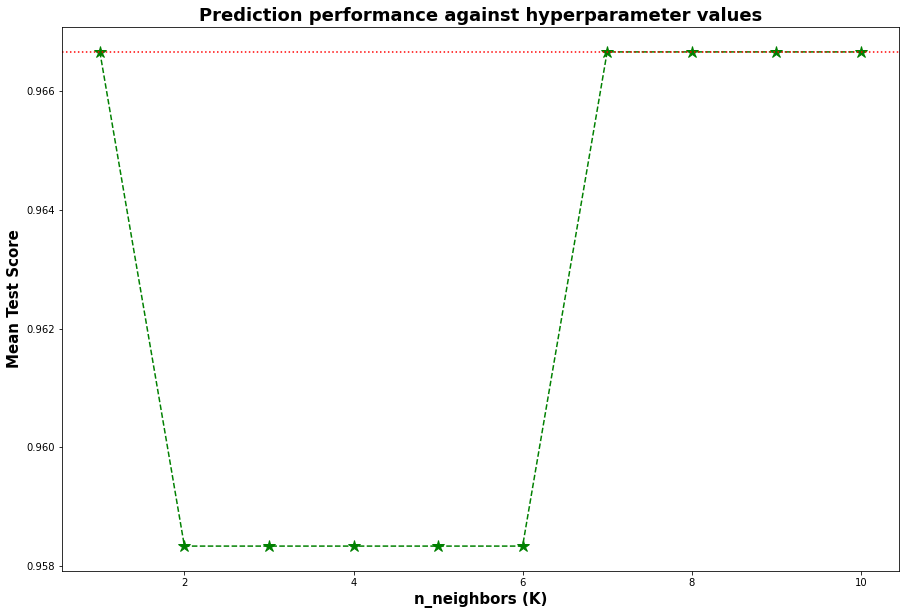

In [47]:
# select columns to plot
X = cv_df[['param_knn__n_neighbors', 'mean_test_score']]

# plot graph
plt.figure(figsize=(15,10))
plt.title('Prediction performance against hyperparameter values', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.plot(X.iloc[:, 0], X.iloc[:, 1], linestyle='--', marker='*', markersize=12, color='green')
plt.axhline(np.max(X.iloc[:, 1]), linestyle=':', color='red')
plt.xlabel('n_neighbors (K)', fontdict={'fontsize':15, 'fontweight':'bold'})
plt.ylabel('Mean Test Score', fontdict={'fontsize':15, 'fontweight':'bold'})
plt.show()

**NOTE: Horizontal lines represent the best/optimal values of parameter (K). The *First* point of
touch in the horizontal line is optimal value (K=1), however other points on that line can also be considered optimal value.**

**D. Evaluate the model (obtained from A) performance on the test set. Report the confusion
matrix, F1-score and accuracy.**

The KNN accuracy is 96.25%
The KNN F1 Score is 95.24%
Classification Report:
              precision    recall  f1-score   support

         ckd       1.00      0.94      0.97        50
      notckd       0.91      1.00      0.95        30

    accuracy                           0.96        80
   macro avg       0.95      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80



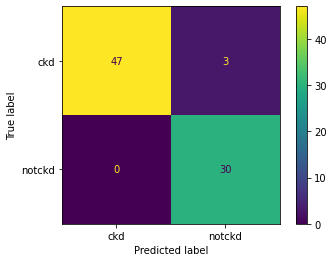

In [48]:
# predict
y_pred = knn_opt_pipeline.predict(x_test)

# accuracy
acc = f'{accuracy_score(y_test, y_pred)*100:.2f}%'
print(f'The KNN accuracy is {acc}')

# store for plotting
model_performance.append(('KNN', f1_score(y_test, y_pred)))

# F1 score
print(f'The KNN F1 Score is {f1_score(y_test, y_pred)*100:.2f}%')

# confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)

# display confusion matrix
ConfusionMatrixDisplay(confusion_mtx, display_labels=['ckd', 'notckd']).plot()

# classification report
print(f"Classification Report:\n{classification_report(y_test, y_pred, target_names=['ckd', 'notckd'])}")


**Decision Tree**

The Decision Tree accuracy is 93.75%
The Decision Tree F1 Score is 90.91%
Classification Report:
              precision    recall  f1-score   support

         ckd       0.91      1.00      0.95        50
      notckd       1.00      0.83      0.91        30

    accuracy                           0.94        80
   macro avg       0.95      0.92      0.93        80
weighted avg       0.94      0.94      0.94        80



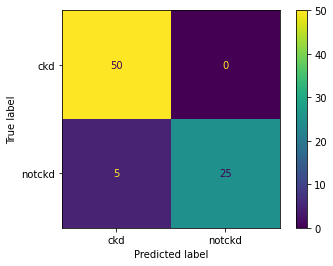

In [49]:
# decision tree clasifier
dt_clf = DecisionTreeClassifier(random_state=11)

# build pipeline
dt_pipeline = Pipeline([
    ('numerical scaling', num_transform),
    ('decision_tree', dt_clf)
])

# fit
dt_pipeline.fit(x_train, y_train)

# predict
y_pred = dt_pipeline.predict(x_test)

# accuracy score
print(f'The Decision Tree accuracy is {accuracy_score(y_test, y_pred)*100:.2f}%')

# F1 score
print(f'The Decision Tree F1 Score is {f1_score(y_test, y_pred)*100:.2f}%')

# confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)

# display confusion matrix
ConfusionMatrixDisplay(confusion_mtx, display_labels=['ckd', 'notckd']).plot()

# classification report
print(f"Classification Report:\n{classification_report(y_test, y_pred, target_names=['ckd', 'notckd'])}")

**Gridsearch Decision Tree Classifier**

In [50]:
# parameters to Gridsearch
dt_params = [
    {'decision_tree__criterion':['entropy', 'gini'],
     'decision_tree__max_depth':[x for x in range(1,11)]}
]

# grid search
dt_gs = GridSearchCV(dt_pipeline, param_grid=dt_params, scoring='recall', cv=5, n_jobs=-1)

# fit
dt_gs.fit(x_train, y_train)

# best parameters
print(f'Best parameters: {dt_gs.best_params_}')

# best score
print(f'Best score: {dt_gs.best_score_}')

# store cv results
cv_results = dt_gs.cv_results_

Best parameters: {'decision_tree__criterion': 'gini', 'decision_tree__max_depth': 5}
Best score: 0.9833333333333334


**A. Build optimised classification model to predict the chronic kidney disease from the dataset.**

In [51]:
# optimised Decision Tree clasifier
dt_optimised = DecisionTreeClassifier(criterion='gini', max_depth=5)

# build pipeline
dt_opt_pipeline = Pipeline([
    ('numerical scaling', num_transform),
    ('decision_tree', dt_optimised)
])

# train the model
dt_opt_pipeline.fit(x_train, y_train)

Pipeline(steps=[('numerical scaling',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  ['age', 'bp', 'bgr', 'bu',
                                                   'sc', 'sod', 'pot', 'hemo',
                                                   'pcv', 'wbcc', 'rbcc'])])),
                ('decision_tree', DecisionTreeClassifier(max_depth=5))])

**B. For each optimised model, answer the followings - (3 marks)**
- **which hyperparameters were optimised? [Hint: For SVM, kernel can be considered as one of the hyperparameters.]**
> 'criterion' and 'max_depth' were optimised.
>The criterion is the function to measure the quality of a split.
>'max_depth' is the maximum number of children nodes that can grow out from the decision tree until the tree is cut off.


- **what set or range of values were used for each hyperparameter?**
> For hyperparameter 'criterion', I used ['entropy', 'gini'] and
>for 'max_depth', I used number between 1 to 10.


- **which metric was used to measure the performance?**
> I used recall to measure the performance because
>it is important to make sure all the patients with disease are identified regardless of
>raising a false alarm. This metrics helps to make sure that the actual positive cases are detected, in other word, the actual positive cases should
>not go undetected.


- **justify your design decisions.**
> The default parameters for Decision Tree classifier lead to fully grown and unpruned trees which can potentially be very
>large on some data sets. In order to reduce memory consumption, complexity and size of the trees, it is important to find the
>optimal value for such parameters. The criterion and max_depth parameters have a significant impact on the performance of the model.


**C. Plot the prediction performance against hyperparameter values to visualise the optimisation
process and mark the optimal value.**

In [52]:
# put cv_results into dataframe
cv_df = pd.DataFrame(cv_results)
cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decision_tree__criterion,param_decision_tree__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.026071,0.005883,0.034776,0.015390,entropy,1,"{'decision_tree__criterion': 'entropy', 'decis...",0.916667,0.916667,0.958333,1.0,0.958333,0.950000,0.031180,19
1,0.043127,0.009872,0.021432,0.002642,entropy,2,"{'decision_tree__criterion': 'entropy', 'decis...",0.958333,0.916667,0.958333,1.0,1.000000,0.966667,0.031180,10
2,0.033286,0.012509,0.015957,0.002561,entropy,3,"{'decision_tree__criterion': 'entropy', 'decis...",0.958333,0.916667,0.958333,1.0,1.000000,0.966667,0.031180,10
3,0.021818,0.002711,0.020062,0.008877,entropy,4,"{'decision_tree__criterion': 'entropy', 'decis...",0.958333,0.916667,0.958333,1.0,1.000000,0.966667,0.031180,10
4,0.034437,0.011275,0.021975,0.006265,entropy,5,"{'decision_tree__criterion': 'entropy', 'decis...",0.958333,0.916667,0.958333,1.0,1.000000,0.966667,0.031180,10
5,0.043524,0.028267,0.018892,0.005751,entropy,6,"{'decision_tree__criterion': 'entropy', 'decis...",0.958333,0.916667,0.958333,1.0,1.000000,0.966667,0.031180,10
6,0.024933,0.004266,0.014601,0.000676,entropy,7,"{'decision_tree__criterion': 'entropy', 'decis...",0.958333,0.916667,0.958333,1.0,1.000000,0.966667,0.031180,10
7,0.027238,0.005319,0.015015,0.001024,entropy,8,"{'decision_tree__criterion': 'entropy', 'decis...",0.958333,0.916667,0.958333,1.0,1.000000,0.966667,0.031180,10
8,0.044624,0.027449,0.017035,0.002953,entropy,9,"{'decision_tree__criterion': 'entropy', 'decis...",0.958333,0.916667,0.958333,1.0,1.000000,0.966667,0.031180,10
9,0.028516,0.012042,0.016906,0.004794,entropy,10,"{'decision_tree__criterion': 'entropy', 'decis...",0.958333,0.916667,0.958333,1.0,1.000000,0.966667,0.031180,10


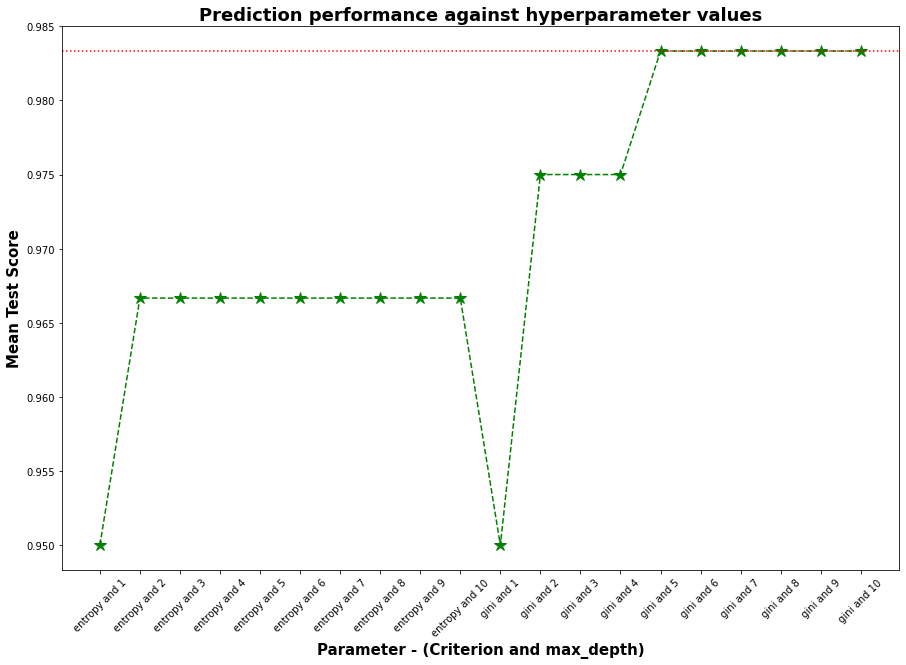

In [53]:
# select columns to plot
X = cv_df[['param_decision_tree__criterion', 'param_decision_tree__max_depth', 'mean_test_score']]

# combined
X['combined_param'] = (X['param_decision_tree__criterion'].map(str) + ' and '+  X['param_decision_tree__max_depth'].values.astype(str))

# plot graph
plt.figure(figsize=(15,10))
plt.title('Prediction performance against hyperparameter values', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.plot(X['combined_param'], X['mean_test_score'], linestyle='--', marker='*', markersize=12, color='green')
plt.axhline(np.max(X['mean_test_score']), linestyle=':', color='red')
plt.xlabel('Parameter - (Criterion and max_depth)', fontdict={'fontsize':15, 'fontweight':'bold'})
plt.ylabel('Mean Test Score', fontdict={'fontsize':15, 'fontweight':'bold'})
plt.xticks(rotation=45)
plt.show()

**NOTE: Horizontal lines represent the best/optimal values of parameters (criterion and max_depth). The *First* point of
touch in the horizontal line is optimal value (entropy and 10), however other points on that line can also be considered optimal value.**

**D. Evaluate the model (obtained from A) performance on the test set. Report the confusion
matrix, F1-score and accuracy.**

The Decision Tree accuracy is 95.00%
The Decision Tree F1 Score is 92.86%
Classification Report:
              precision    recall  f1-score   support

         ckd       0.93      1.00      0.96        50
      notckd       1.00      0.87      0.93        30

    accuracy                           0.95        80
   macro avg       0.96      0.93      0.95        80
weighted avg       0.95      0.95      0.95        80



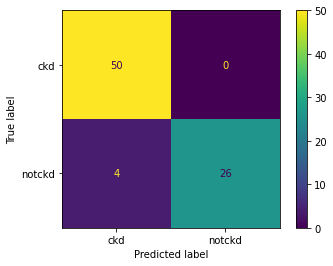

In [54]:
# predict
y_pred = dt_opt_pipeline.predict(x_test)

# accuracy score
acc = f'{accuracy_score(y_test, y_pred)*100:.2f}%'
print(f'The Decision Tree accuracy is {acc}')

# store for plotting
model_performance.append(('Decision Tree', f1_score(y_test, y_pred)))

# F1 score
print(f'The Decision Tree F1 Score is {f1_score(y_test, y_pred)*100:.2f}%')

# confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)

# display confusion matrix
ConfusionMatrixDisplay(confusion_mtx, display_labels=['ckd', 'notckd']).plot()

# classification report
print(f"Classification Report:\n{classification_report(y_test, y_pred, target_names=['ckd', 'notckd'])}")

**Random Forest**

The Random Forest accuracy is 98.75%
The Random Forest F1 Score is 98.31%
Classification Report:
              precision    recall  f1-score   support

         ckd       0.98      1.00      0.99        50
      notckd       1.00      0.97      0.98        30

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



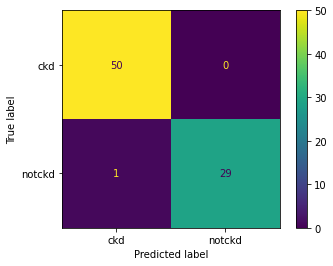

In [55]:
# Random Forest Clasifier
rf_clf = RandomForestClassifier(random_state=1)

# build pipeline
rf_pipeline = Pipeline([
    ('numerical scaling', num_transform),
    ('random_forest', rf_clf)
])

# fit
rf_pipeline.fit(x_train, y_train)

# predict
y_pred = rf_pipeline.predict(x_test)

# accuracy score
print(f'The Random Forest accuracy is {accuracy_score(y_test, y_pred)*100:.2f}%')

# F1 score
print(f'The Random Forest F1 Score is {f1_score(y_test, y_pred)*100:.2f}%')

# confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)

# display confusion matrix
ConfusionMatrixDisplay(confusion_mtx, display_labels=['ckd', 'notckd']).plot()

# classification report
print(f"Classification Report:\n{classification_report(y_test, y_pred, target_names=['ckd', 'notckd'])}")

**Gridsearch Random Forest Classifier**

In [56]:
# parameters to Gridsearch
rf_params = [
    {'random_forest__criterion':['gini'],
     'random_forest__n_estimators':[x for x in range(100,200,20)]
    }
]

# grid search
rf_gs = GridSearchCV(rf_pipeline, param_grid=rf_params, scoring='recall', cv=5, n_jobs=-1, verbose=1)

# fit
rf_gs.fit(x_train, y_train)

# best parameters
print(f'Best parameters: {rf_gs.best_params_}')

# best score
print(f'Best score: {rf_gs.best_score_}')

# store cv results
cv_results = rf_gs.cv_results_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'random_forest__criterion': 'gini', 'random_forest__n_estimators': 100}
Best score: 0.9833333333333334


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.8s finished


**A. Build optimised classification model to predict the chronic kidney disease from the dataset.**

In [57]:
# optimised Random Forest clasifier
rf_optimised = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=1)

# build pipeline
rf_opt_pipeline = Pipeline([
    ('numerical scaling', num_transform),
    ('random_forest', rf_optimised)
])

# train the model
rf_opt_pipeline.fit(x_train, y_train)

Pipeline(steps=[('numerical scaling',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  ['age', 'bp', 'bgr', 'bu',
                                                   'sc', 'sod', 'pot', 'hemo',
                                                   'pcv', 'wbcc', 'rbcc'])])),
                ('random_forest', RandomForestClassifier(random_state=1))])

**B. For each optimised model, answer the followings - (3 marks)**
- **which hyperparameters were optimised? [Hint: For SVM, kernel can be considered as one of the hyperparameters.]**
> 'n_estimators' and 'criterion'were optimised.
> 'n_estimators' is the number of trees in the forest.
> The criterion is the function to measure the quality of a split.

- **what set or range of values were used for each hyperparameter?**
> For hyperparameter 'n_estimators', I used values between 100 to 200 with the interval of 20.
>For hyperparameter 'criterion', I used ['gini']


- **which metric was used to measure the performance?**
> I used recall to measure the performance because
>it is important to make sure all the patients with disease are identified regardless of
>raising a false alarm. This metrics helps to make sure that the actual positive cases are detected, in other word, the actual positive cases should
>not go undetected.



- **justify your design decisions.**
>The default parameters of Random Forest classifier perfomed better so I planned to change few parameters and see if it improves. However,
>there was no improvement.
>Random Forest is collection of Decision Trees so hyperparameter tuning can improve the model performance.
>The criterion gini performed better as it is the default criterion for Random Forest. So, it was not necessary to change it so I set it default so
>that the hyperparameters are less which is computationally cheaper and time saving.
>n_estimator is another important hyperparameter that impacts the performance of the model so it
>is necessary to find the optimal value. In addition, this parameter has significant influence for making model underfit and overfit.



**C. Plot the prediction performance against hyperparameter values to visualise the optimisation
process and mark the optimal value.**

In [58]:
# put cv_results into dataframe
cv_df = pd.DataFrame(cv_results)
cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__criterion,param_random_forest__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.673041,0.010539,0.059621,0.007768,gini,100,"{'random_forest__criterion': 'gini', 'random_f...",0.958333,1.0,0.958333,1.0,1.0,0.983333,0.020412,1
1,0.771942,0.022697,0.072748,0.011115,gini,120,"{'random_forest__criterion': 'gini', 'random_f...",0.958333,1.0,0.958333,1.0,1.0,0.983333,0.020412,1
2,0.939395,0.053272,0.120748,0.033999,gini,140,"{'random_forest__criterion': 'gini', 'random_f...",0.958333,1.0,0.958333,1.0,1.0,0.983333,0.020412,1
3,1.489791,0.158932,0.189848,0.051833,gini,160,"{'random_forest__criterion': 'gini', 'random_f...",0.958333,1.0,0.958333,1.0,1.0,0.983333,0.020412,1
4,1.802514,0.323892,0.094654,0.042065,gini,180,"{'random_forest__criterion': 'gini', 'random_f...",0.958333,1.0,0.958333,1.0,1.0,0.983333,0.020412,1


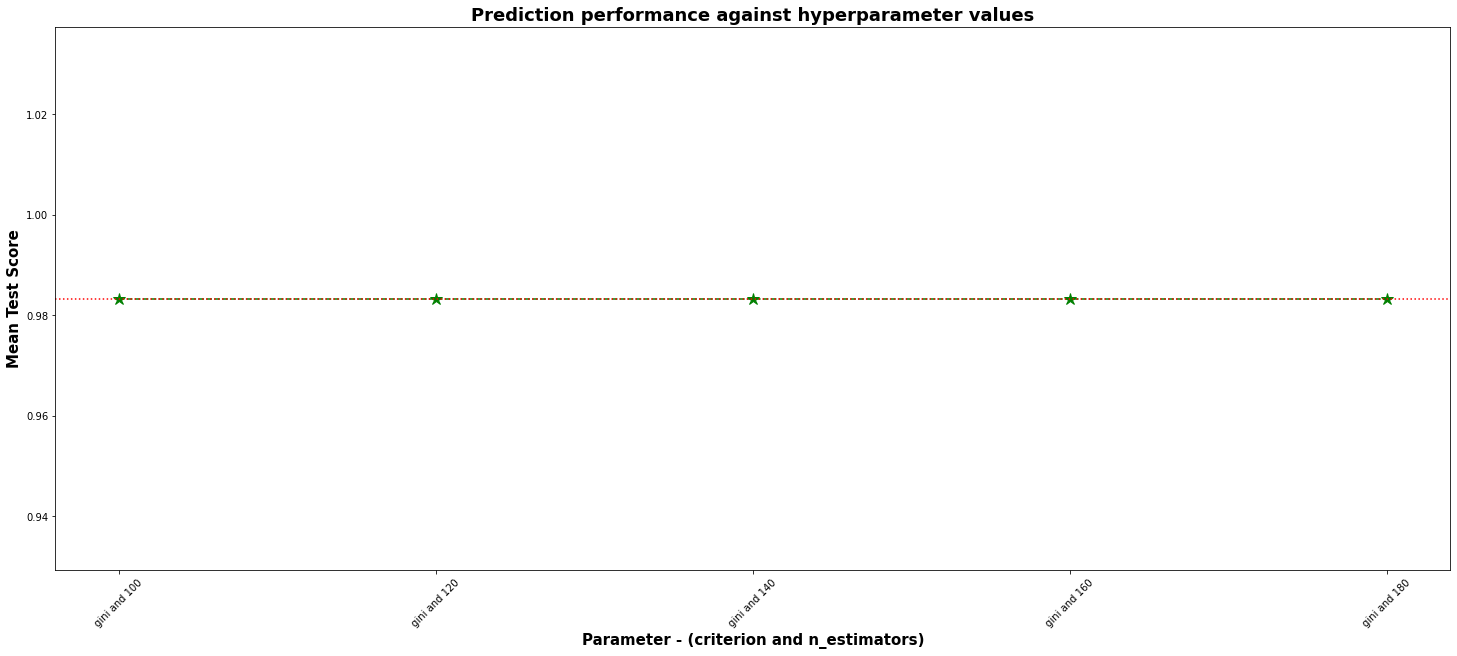

In [59]:
# select columns to plot
X = cv_df[['param_random_forest__criterion', 'param_random_forest__n_estimators', 'mean_test_score']]

# combined
X['combined_param'] = (X['param_random_forest__criterion'].astype(str)+ ' and '+ X['param_random_forest__n_estimators'].astype(str))

# plot graph
plt.figure(figsize=(25,10))
plt.title('Prediction performance against hyperparameter values', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.plot(X['combined_param'], X['mean_test_score'], linestyle='--', marker='*', markersize=12, color='green')
plt.axhline(np.max(X['mean_test_score']), linestyle=':', color='red')
plt.xlabel('Parameter - (criterion and n_estimators)', fontdict={'fontsize':15, 'fontweight':'bold'})
plt.ylabel('Mean Test Score', fontdict={'fontsize':15, 'fontweight':'bold'})
plt.xticks(rotation=45)
plt.show()

**NOTE: Horizontal lines represent the best/optimal values of parameters. The *First* point of
touch in the horizontal line is optimal value (gini and 100), however other points on that line can also be considered optimal value.**

**D. Evaluate the model (obtained from A) performance on the test set. Report the confusion
matrix, F1-score and accuracy.**

The Random Forest accuracy is 98.75%
The Random Forest F1 Score is 98.31%
Classification Report:
              precision    recall  f1-score   support

         ckd       0.98      1.00      0.99        50
      notckd       1.00      0.97      0.98        30

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



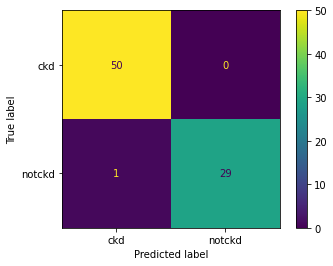

In [60]:
# predict
y_pred = rf_opt_pipeline.predict(x_test)

# accuracy score
acc = f'{accuracy_score(y_test, y_pred)*100:.2f}%'
print(f'The Random Forest accuracy is {acc}')

# store for plotting
model_performance.append(('Random Forest', f1_score(y_test, y_pred)))

# F1 score
print(f'The Random Forest F1 Score is {f1_score(y_test, y_pred)*100:.2f}%')

# confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)

# display confusion matrix
ConfusionMatrixDisplay(confusion_mtx, display_labels=['ckd', 'notckd']).plot()

# classification report
print(f"Classification Report:\n{classification_report(y_test, y_pred, target_names=['ckd', 'notckd'])}")


## Part 3: Discussion **(5 marks)**

Based on the results obtained in Part-2, which classification method showed the best performance and why? Do you have any suggestions to further improve the model performances? **(5 marks)**

**Plot Accuracy Plot for all models**

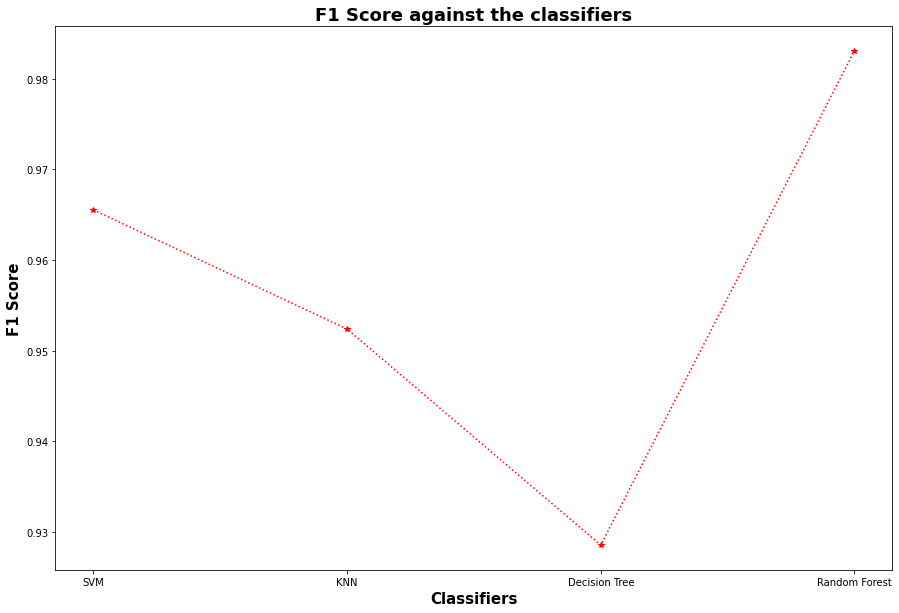

In [61]:
# plot
model = [x for x, y in model_performance]
acc = [y for x, y in model_performance]

plt.figure(figsize=(15,10))
plt.title('F1 Score against the classifiers', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.plot(model, acc, color='red', linestyle=':', marker='*')
plt.xlabel('Classifiers', fontdict={'fontsize':15, 'fontweight':'bold'})
plt.ylabel('F1 Score', fontdict={'fontsize':15, 'fontweight':'bold'})
plt.show()

**which classification method showed the best performance and why?**

**Answer:**

**Random Forest** classifier showed the best performance. F1 Score combines precision and recall
of the model. F1 score is better than accuracy in this dataset because firstly, our data is not
balanced with classes (imbalance data). This metrics helps to make sure that the actual positive cases are detected, in other word, the actual positive cases should
not go undetected.

The reason for it are as follows:
- The random forest classifier is ensemble method which is divide and conquer approach that is
used to improve performance.
- Random forest being ensemble model, it combines multiple decision tree models to improve the accuracy using bagging and boosting which improves the predictive performance more than any single model.
- The random forest also use the random subspace method and bagging to prevent overfitting.
- It has Automated feature selection built in.


**Do you have any suggestions to further improve the model performances?**

**Answer:**

Here are the suggestions to further improve the model performances:
- Currently this dataset is small, so adding more data to train the model will help to make better and accurate models.
- Feature selection can be used to select the useful features using techniques such as domain knowledge or correlation matrix.
- Principal Component Analysis (PCA) can also be used to represent training data in lower dimension without loosing much information.
- Treatment of missing values and outliers should be done with proper domain knowledge so that it prevents from inaccurate prediction.

